#Proyecto Procesamiento de Datos a Gran Escala
## Realizado por:
* Andres Felipe Galan Cardenas
* Diego Alejandro Martínez Oviedo
* Julian Andrey Mendez Rodriguez
* Samuel Andres Lamilla Verjan
* Steven Viscillinovick Robles Patiño


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar hojas del archivo Excel
idf_xls = pd.ExcelFile('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx')

print("Hojas en IDF:", idf_xls.sheet_names)


Hojas en IDF: ['Nota aclaratoria', 'Municipios 2023', 'Departamentos 2023']


In [ ]:
# Cargar ignorando las primeras filas innecesarias
df_idf1 = pd.read_excel('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx', sheet_name='Municipios 2023', skiprows=6)
df_idf2 = pd.read_excel('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx', sheet_name='Departamentos 2023', skiprows=6)

# Verificar el DataFrame
print(df_idf1.head())
print(df_idf2.head())


   Código Departamento   Municipio Categorías Dotaciones Iniciales  \
0    5001    ANTIOQUIA    MEDELLÍN          E                    C   
1    5002    ANTIOQUIA   ABEJORRAL          6                   G4   
2    5004    ANTIOQUIA    ABRIAQUÍ          6                   G3   
3    5021    ANTIOQUIA  ALEJANDRÍA          6                   G2   
4    5030    ANTIOQUIA       AMAGÁ          5                   G2   

   Ciudad capital Dependencia de las Transferencias  \
0               1                         29.074403   
1               0                         66.571675   
2               0                          51.89963   
3               0                         43.667166   
4               0                         44.470967   

   Calificación Dependencia de las Transferencias Relevancia FBK fijo  \
0                                       70.925597           18.508373   
1                                       33.428325           29.330906   
2                            

In [ ]:
# Cargar archivos en Pandas
df_poblacion = pd.read_csv('/content/Proyección de la población de Cundinamarca para 2023 - Colombia.csv')
df_educacion = pd.read_csv('/content/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO_20250222.csv')
df_icfes = pd.read_csv('/content/Pruebas_ICFES_20250222.csv')
df_internet = pd.read_csv('/content/Internet_Fijo_Penetraci_n_Municipio_20250222.csv')


In [ ]:
# Diccionario con los DataFrames
dataframes = {
    "IDF Municipios": df_idf1,
    "IDF Departamentos": df_idf2,
    "Población": df_poblacion,
    "Educación": df_educacion,
    "ICFES": df_icfes,
    "Internet": df_internet,
}

# Mostrar las primeras filas de cada DataFrame
for nombre, df in dataframes.items():
    print(f"\n===== {nombre} =====\n")
    print(df.head(), "\n")  # Imprime las primeras filas con un salto de línea



===== IDF Municipios =====

   Código Departamento   Municipio Categorías Dotaciones Iniciales  \
0    5001    ANTIOQUIA    MEDELLÍN          E                    C   
1    5002    ANTIOQUIA   ABEJORRAL          6                   G4   
2    5004    ANTIOQUIA    ABRIAQUÍ          6                   G3   
3    5021    ANTIOQUIA  ALEJANDRÍA          6                   G2   
4    5030    ANTIOQUIA       AMAGÁ          5                   G2   

   Ciudad capital Dependencia de las Transferencias  \
0               1                         29.074403   
1               0                         66.571675   
2               0                          51.89963   
3               0                         43.667166   
4               0                         44.470967   

   Calificación Dependencia de las Transferencias Relevancia FBK fijo  \
0                                       70.925597           18.508373   
1                                       33.428325           29.330906   


In [ ]:
# Información general de cada dataset
for name, df in {
   "IDF Municipios": df_idf1, "IDF Departamentos": df_idf2, "Educación": df_educacion, "ICFES": df_icfes, "Internet": df_internet
}.items():
    print(f"\n--- {name} ---")
    print(df.info(), "\n")



--- IDF Municipios ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Código                                                        1102 non-null   int64  
 1   Departamento                                                  1102 non-null   object 
 2   Municipio                                                     1102 non-null   object 
 3   Categorías                                                    1102 non-null   object 
 4   Dotaciones Iniciales                                          1102 non-null   object 
 5   Ciudad capital                                                1102 non-null   int64  
 6   Dependencia de las Transferencias                             1102 non-null   object 
 7   Calificación Dependencia de las Transferencia

In [ ]:
# Estadísticas básicas
for name, df in {
    "IDF Municipios": df_idf1,
    "IDF Departamentos": df_idf2,
    "Población": df_poblacion,
    "Educación": df_educacion,
    "ICFES": df_icfes,
    "Internet": df_internet,
}.items():
    print(f"\n--- {name} ---")
    print(df.describe(), "\n")



--- IDF Municipios ---
             Código  Ciudad capital  \
count   1102.000000     1102.000000   
mean   37723.376588        0.028131   
std    25759.702728        0.165421   
min     5001.000000        0.000000   
25%    15649.500000        0.000000   
50%    25783.000000        0.000000   
75%    63376.250000        0.000000   
max    99773.000000        1.000000   

       Calificación Dependencia de las Transferencias  \
count                                     1102.000000   
mean                                        31.784210   
std                                         18.511180   
min                                          0.000000   
25%                                         17.885420   
50%                                         27.896025   
75%                                         43.592100   
max                                         95.524757   

       Calificación Relevancia FBK fijo  Endeudamiento (Total)  \
count                       1102.000000     

In [ ]:
# Configuración general para las gráficas
sns.set(style="whitegrid")

# 1️⃣ Estadísticos Descriptivos (describe para todas las bases)
for nombre, df in dataframes.items():
    print(f"\n===== Estadísticas Descriptivas de {nombre} =====\n")
    print(df.describe(), "\n")



===== Estadísticas Descriptivas de IDF Municipios =====

             Código  Ciudad capital  \
count   1102.000000     1102.000000   
mean   37723.376588        0.028131   
std    25759.702728        0.165421   
min     5001.000000        0.000000   
25%    15649.500000        0.000000   
50%    25783.000000        0.000000   
75%    63376.250000        0.000000   
max    99773.000000        1.000000   

       Calificación Dependencia de las Transferencias  \
count                                     1102.000000   
mean                                        31.784210   
std                                         18.511180   
min                                          0.000000   
25%                                         17.885420   
50%                                         27.896025   
75%                                         43.592100   
max                                         95.524757   

       Calificación Relevancia FBK fijo  Endeudamiento (Total)  \
count     

In [ ]:
# 2️⃣ Conteo de filas y columnas por dataset
print("\n===== Dimensiones de los DataFrames =====")
for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape[0]} filas, {df.shape[1]} columnas")


===== Dimensiones de los DataFrames =====
IDF Municipios: 1102 filas, 32 columnas
IDF Departamentos: 32 filas, 28 columnas
Población: 117 filas, 4 columnas
Educación: 14585 filas, 41 columnas
ICFES: 63 filas, 12 columnas
Internet: 35578 filas, 9 columnas


In [ ]:
# 3️⃣ Visualización de los tipos de datos
print("\n===== Tipos de Datos en cada DataFrame =====")
for nombre, df in dataframes.items():
    print(f"\n{nombre}:\n")
    print(df.dtypes, "\n")


===== Tipos de Datos en cada DataFrame =====

IDF Municipios:

Código                                                            int64
Departamento                                                     object
Municipio                                                        object
Categorías                                                       object
Dotaciones Iniciales                                             object
Ciudad capital                                                    int64
Dependencia de las Transferencias                                object
Calificación Dependencia de las Transferencias                  float64
Relevancia FBK fijo                                              object
Calificación Relevancia FBK fijo                                float64
Endeudamiento (Total)                                           float64
Calificación Endeudamiento Total                                float64
Ahorro Corriente                                                 object


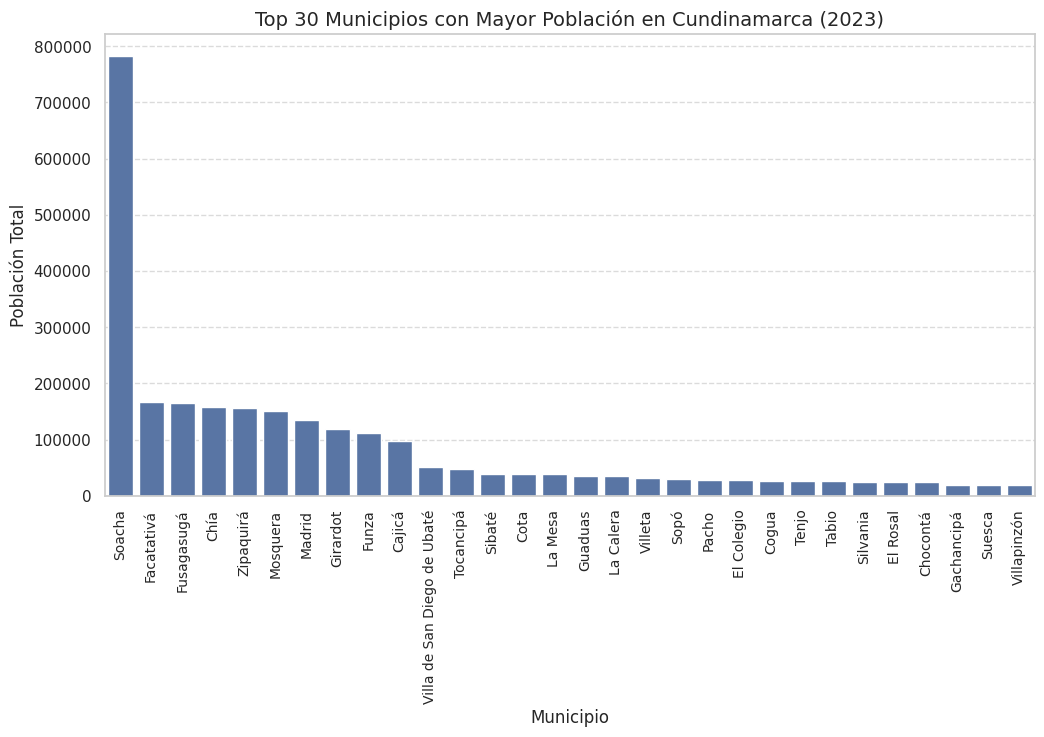

In [ ]:
# 4️⃣ Gráfica de Distribución de Población
# Seleccionamos los 30 municipios con más población
# Filtrar la fila donde el municipio es "Total" (o cualquier otro nombre que represente el total)
df_poblacion_filtrado = df_poblacion[df_poblacion["Municipio"] != "Total"]

# Seleccionar los 30 municipios con más población
df_top30 = df_poblacion_filtrado.sort_values(by="Total", ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_top30["Municipio"], y=df_top30["Total"])

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Población Total", fontsize=12)
plt.title("Top 30 Municipios con Mayor Población en Cundinamarca (2023)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

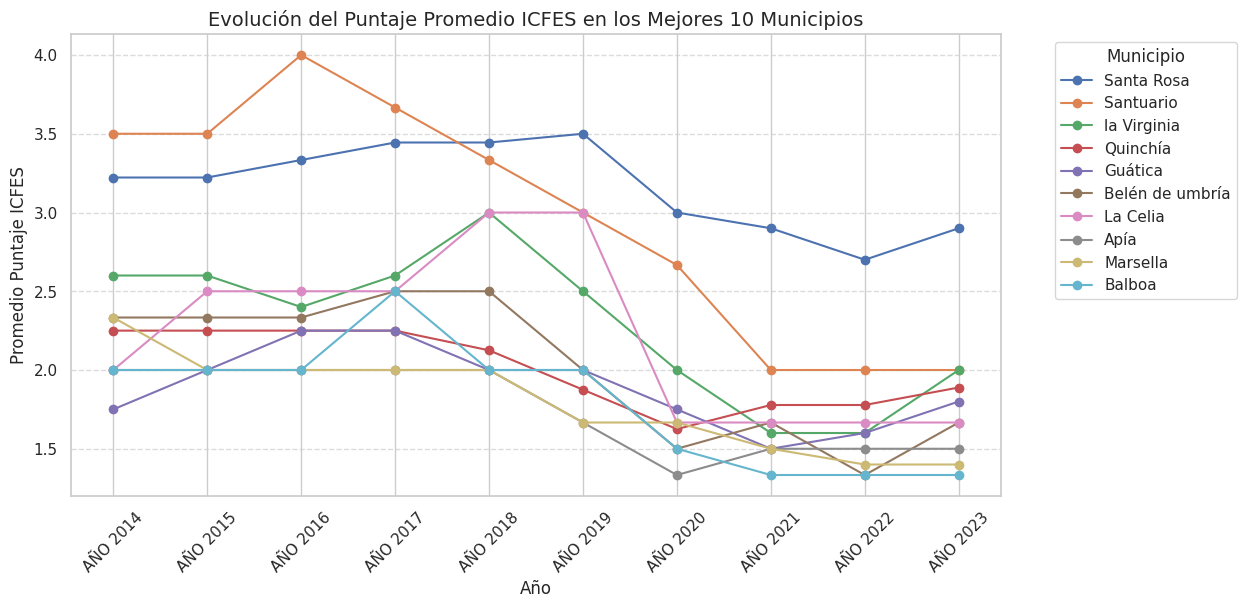

In [ ]:
#️ 5️⃣ Comparación del Puntaje Promedio ICFES
# Mapeo de categorías a valores numéricos
categorias_icfes = {"D": 1, "C": 2, "B": 3, "A": 4, "A+": 5, "NR": None, "NA": None}

# Reemplazar las categorías con valores numéricos en el DataFrame
df_icfes_num = df_icfes.copy()
columnas_puntajes = [col for col in df_icfes.columns if "AÑO" in col]  # Seleccionar columnas de años

for col in columnas_puntajes:
    df_icfes_num[col] = df_icfes_num[col].map(categorias_icfes)

# Agrupar por municipio y calcular el promedio anual
df_promedio_municipio = df_icfes_num.groupby("MUNICIPIO")[columnas_puntajes].mean()

# Seleccionar los municipios con mejores puntajes en el último año reportado
df_top_municipios = df_promedio_municipio.sort_values(by="AÑO 2023", ascending=False).head(10)

# Graficar la evolución del puntaje promedio en estos municipios
plt.figure(figsize=(12, 6))

for municipio in df_top_municipios.index:
    plt.plot(columnas_puntajes, df_top_municipios.loc[municipio], marker="o", label=municipio)

plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio Puntaje ICFES", fontsize=12)
plt.title("Evolución del Puntaje Promedio ICFES en los Mejores 10 Municipios", fontsize=14)
plt.legend(title="Municipio", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()


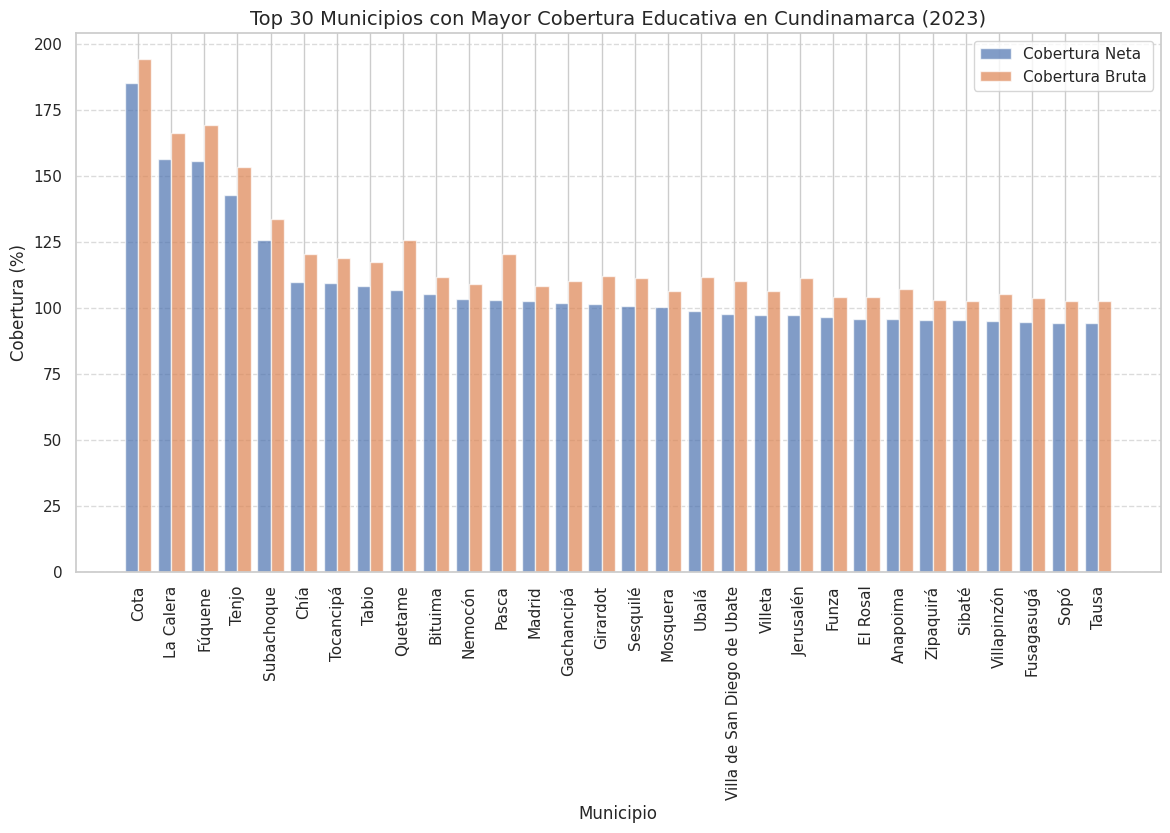

In [ ]:
# 6️⃣ Comparación de municipios con mayor cobertura educativa
# Filtrar datos solo para Cundinamarca
df_cundinamarca = df_educacion[df_educacion["DEPARTAMENTO"] == "Cundinamarca"]

# Obtener el último año disponible
ultimo_anio = df_cundinamarca["AÑO"].max()
df_ultimo_anio = df_cundinamarca[df_cundinamarca["AÑO"] == ultimo_anio]

# Seleccionar columnas clave
df_cobertura = df_ultimo_anio[["MUNICIPIO", "COBERTURA_NETA", "COBERTURA_BRUTA"]]

# Ordenar por cobertura neta y seleccionar los 30 municipios con mayor cobertura
df_top_cobertura = df_cobertura.sort_values(by="COBERTURA_NETA", ascending=False).head(30)

# Graficar la cobertura educativa
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(df_top_cobertura))

plt.bar(x, df_top_cobertura["COBERTURA_NETA"], width=bar_width, label="Cobertura Neta", alpha=0.7)
plt.bar([i + bar_width for i in x], df_top_cobertura["COBERTURA_BRUTA"], width=bar_width, label="Cobertura Bruta", alpha=0.7)

plt.xticks([i + bar_width / 2 for i in x], df_top_cobertura["MUNICIPIO"], rotation=90)
plt.xlabel("Municipio", fontsize=12)
plt.ylabel("Cobertura (%)", fontsize=12)
plt.title(f"Top 30 Municipios con Mayor Cobertura Educativa en Cundinamarca ({ultimo_anio})", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


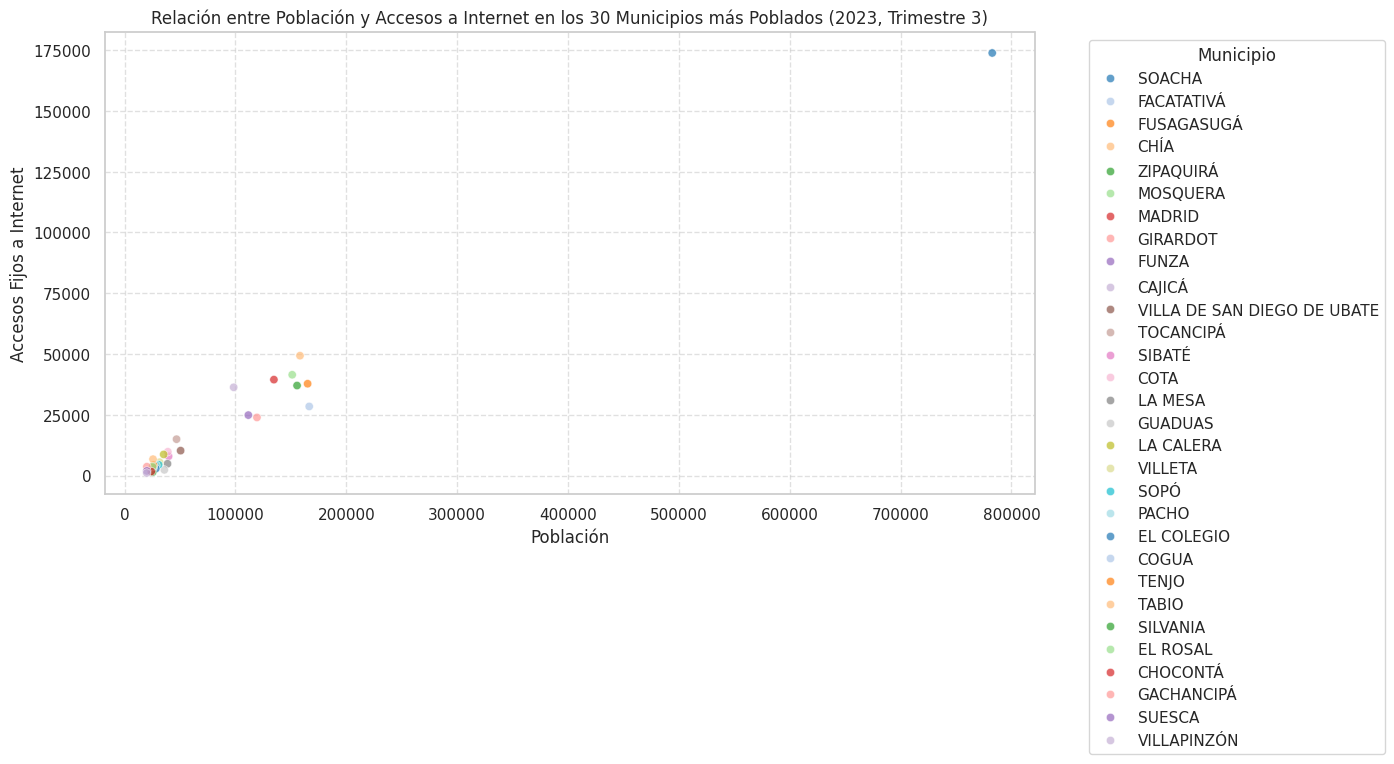

In [ ]:

#7️⃣ Relacion entre la poblacion y accesos a internet
# Filtrar solo Cundinamarca
df_cundi = df_internet[df_internet["DEPARTAMENTO"] == "CUNDINAMARCA"]

# Tomar el último año y trimestre disponibles
ultimo_anio = df_cundi["AÑO"].max()
ultimo_trimestre = df_cundi[df_cundi["AÑO"] == ultimo_anio]["TRIMESTRE"].max()
df_actual = df_cundi[(df_cundi["AÑO"] == ultimo_anio) & (df_cundi["TRIMESTRE"] == ultimo_trimestre)]

# Seleccionar los 30 municipios más poblados
top_30_poblacion = df_actual.nlargest(30, "POBLACIÓN DANE")

# Graficar dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_30_poblacion, x="POBLACIÓN DANE", y="No. ACCESOS FIJOS A INTERNET", hue="MUNICIPIO", palette="tab20", alpha=0.7)

plt.xlabel("Población")
plt.ylabel("Accesos Fijos a Internet")
plt.title(f"Relación entre Población y Accesos a Internet en los 30 Municipios más Poblados ({ultimo_anio}, Trimestre {ultimo_trimestre})")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Municipio", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



In [ ]:
corr = top_30_poblacion["POBLACIÓN DANE"].corr(top_30_poblacion["No. ACCESOS FIJOS A INTERNET"])
print(f"Coeficiente de correlación: {corr:.2f}")


Coeficiente de correlación: 0.99


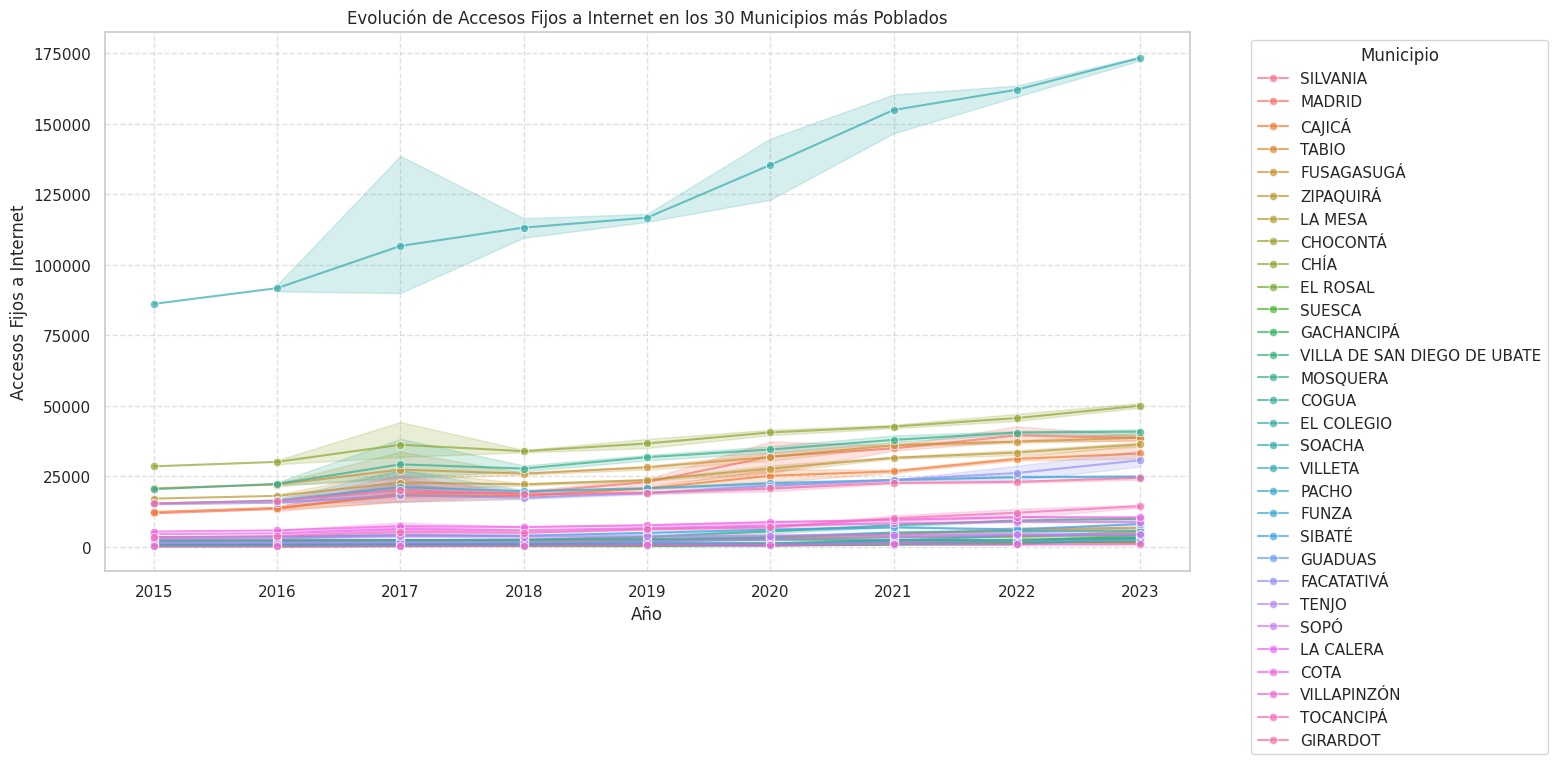

In [ ]:
# 8️⃣ Evolución de los accesos de internet en los municipios
plt.figure(figsize=(14, 7))

# Filtrar solo los 30 municipios más poblados
df_top_30 = df_cundi[df_cundi["MUNICIPIO"].isin(top_30_poblacion["MUNICIPIO"])]

# Graficar evolución
sns.lineplot(data=df_top_30, x="AÑO", y="No. ACCESOS FIJOS A INTERNET", hue="MUNICIPIO", marker="o", alpha=0.7)

plt.xlabel("Año")
plt.ylabel("Accesos Fijos a Internet")
plt.title("Evolución de Accesos Fijos a Internet en los 30 Municipios más Poblados")
plt.legend(title="Municipio", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Reporte de Calidad de Datos

In [ ]:
# 9️⃣ Conteo de Valores Nulos
print("\n===== Valores Faltantes en cada DataFrame =====\n")
for nombre, df in dataframes.items():
    print(f"{nombre}:\n")
    print(df.isnull().sum(), "\n")




===== Valores Faltantes en cada DataFrame =====

IDF Municipios:

Código                                                          0
Departamento                                                    0
Municipio                                                       0
Categorías                                                      0
Dotaciones Iniciales                                            0
Ciudad capital                                                  0
Dependencia de las Transferencias                               0
Calificación Dependencia de las Transferencias                  0
Relevancia FBK fijo                                             0
Calificación Relevancia FBK fijo                                0
Endeudamiento (Total)                                           0
Calificación Endeudamiento Total                                0
Ahorro Corriente                                                0
Calificación Ahorro Corriente                                   0
Balance P

In [ ]:
# 1️⃣0️⃣ Porcentaje de Valores Nulos por Dataset
print("\n===== Porcentaje de Datos Faltantes =====")
for nombre, df in dataframes.items():
    porcentaje_nulos = df.isnull().sum().sum() / df.size * 100
    print(f"{nombre}: {porcentaje_nulos:.2f}% datos faltantes")




===== Porcentaje de Datos Faltantes =====
IDF Municipios: 0.00% datos faltantes
IDF Departamentos: 0.00% datos faltantes
Población: 0.00% datos faltantes
Educación: 3.13% datos faltantes
ICFES: 0.40% datos faltantes
Internet: 0.00% datos faltantes


In [ ]:
# 🔎 Sugerencias para tratar valores nulos:
print("\n===== Posibles Técnicas para Manejo de Datos Faltantes =====")
print("- Eliminación de filas o columnas con demasiados valores nulos.")
print("- Imputación con la media o mediana para datos numéricos.")
print("- Uso de modelos predictivos para estimar valores perdidos.")
print("- Completar valores con base en información externa o reglas de negocio.")


===== Posibles Técnicas para Manejo de Datos Faltantes =====
- Eliminación de filas o columnas con demasiados valores nulos.
- Imputación con la media o mediana para datos numéricos.
- Uso de modelos predictivos para estimar valores perdidos.
- Completar valores con base en información externa o reglas de negocio.


# FILTRADO, LIMPIEZA Y TRANSFORMACION (INICIAL)


## DataFrame: Educacion

### Se opta por filtrar por el año 2023, filtrar por el departamento de Cundinamarca y eliminar la columna de codigo departamento, departamento y año.

### Se cambia el tipo de dato de poblacion a entero

In [ ]:
df_educacion.columns = df_educacion.columns.str.strip().str.upper()
print(df_educacion.columns)


Index(['AÑO', 'MUNICIPIO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA', 'POBLACION_5_16'],
      dtype='object')


In [ ]:
# Filtrar por año 2023
df_educacion = df_educacion[df_educacion['AÑO'] == 2023]

# Filtrar solo los municipios de Cundinamarca
df_educacion = df_educacion[df_educacion['DEPARTAMENTO'] == 'Cundinamarca']



# Convertir tipos de datos
df_educacion['POBLACION_5_16'] = df_educacion['POBLACIÓN_5_16'].astype(int)



KeyError: 'DEPARTAMENTO'

In [ ]:
# Eliminar columnas innecesarias
df_educacion = df_educacion.drop(columns=['DEPARTAMENTO', 'CÓDIGO_MUNICIPIO','CÓDIGO_DEPARTAMENTO'])

KeyError: "['DEPARTAMENTO', 'CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO'] not found in axis"

In [ ]:
# Mostrar las primeras filas del DataFrame filtrado
print(df_educacion.head())

      AÑO     MUNICIPIO  CÓDIGO_ETC                 ETC POBLACIÓN_5_16  \
458  2023  Agua de Dios      3785.0  Cundinamarca (ETC)           1909   
459  2023         Albán      3785.0  Cundinamarca (ETC)           1224   
460  2023      Anapoima      3785.0  Cundinamarca (ETC)           2647   
461  2023      Anolaima      3785.0  Cundinamarca (ETC)           2553   
462  2023      Arbeláez      3785.0  Cundinamarca (ETC)           1894   

     TASA_MATRICULACIÓN_5_16  COBERTURA_NETA  COBERTURA_NETA_TRANSICIÓN  \
458                    79.36           79.36                      59.29   
459                    75.49           75.49                      50.96   
460                    95.92           95.88                      76.42   
461                    93.85           93.26                      59.90   
462                    83.53           83.53                      46.90   

     COBERTURA_NETA_PRIMARIA  COBERTURA_NETA_SECUNDARIA  ...  \
458                    73.07            

In [ ]:
print(df_educacion.shape)


(116, 39)


### Se eliminan las columnas que contienen datos nulos

In [ ]:
print(df_educacion.isnull().sum())


AÑO                              0
MUNICIPIO                        0
CÓDIGO_ETC                       0
ETC                              0
POBLACIÓN_5_16                   0
TASA_MATRICULACIÓN_5_16          0
COBERTURA_NETA                   0
COBERTURA_NETA_TRANSICIÓN        0
COBERTURA_NETA_PRIMARIA          0
COBERTURA_NETA_SECUNDARIA        0
COBERTURA_NETA_MEDIA             0
COBERTURA_BRUTA                  0
COBERTURA_BRUTA_TRANSICIÓN       0
COBERTURA_BRUTA_PRIMARIA         0
COBERTURA_BRUTA_SECUNDARIA       0
COBERTURA_BRUTA_MEDIA            0
TAMAÑO_PROMEDIO_DE_GRUPO       116
SEDES_CONECTADAS_A_INTERNET    116
DESERCIÓN                        0
DESERCIÓN_TRANSICIÓN             0
DESERCIÓN_PRIMARIA               0
DESERCIÓN_SECUNDARIA             0
DESERCIÓN_MEDIA                  0
APROBACIÓN                       0
APROBACIÓN_TRANSICIÓN            0
APROBACIÓN_PRIMARIA              0
APROBACIÓN_SECUNDARIA            0
APROBACIÓN_MEDIA                 0
REPROBACIÓN         

In [ ]:
# Guardamos las columnas originales
columnas_antes = set(df_educacion.columns)

# Eliminamos columnas con valores nulos
df_educacion_limpio = df_educacion.dropna(axis=1)

# Guardamos las columnas después de la limpieza
columnas_despues = set(df_educacion_limpio.columns)

# Identificamos las columnas eliminadas
columnas_eliminadas = columnas_antes - columnas_despues

# Mostramos el resultado
print("Columnas eliminadas por contener valores nulos:")
print(columnas_eliminadas)

# Verificamos las dimensiones
print("Dimensiones originales:", df_educacion.shape)
print("Dimensiones después de limpiar:", df_educacion_limpio.shape)


Columnas eliminadas por contener valores nulos:
{'SEDES_CONECTADAS_A_INTERNET', 'TAMAÑO_PROMEDIO_DE_GRUPO'}
Dimensiones originales: (116, 39)
Dimensiones después de limpiar: (116, 37)


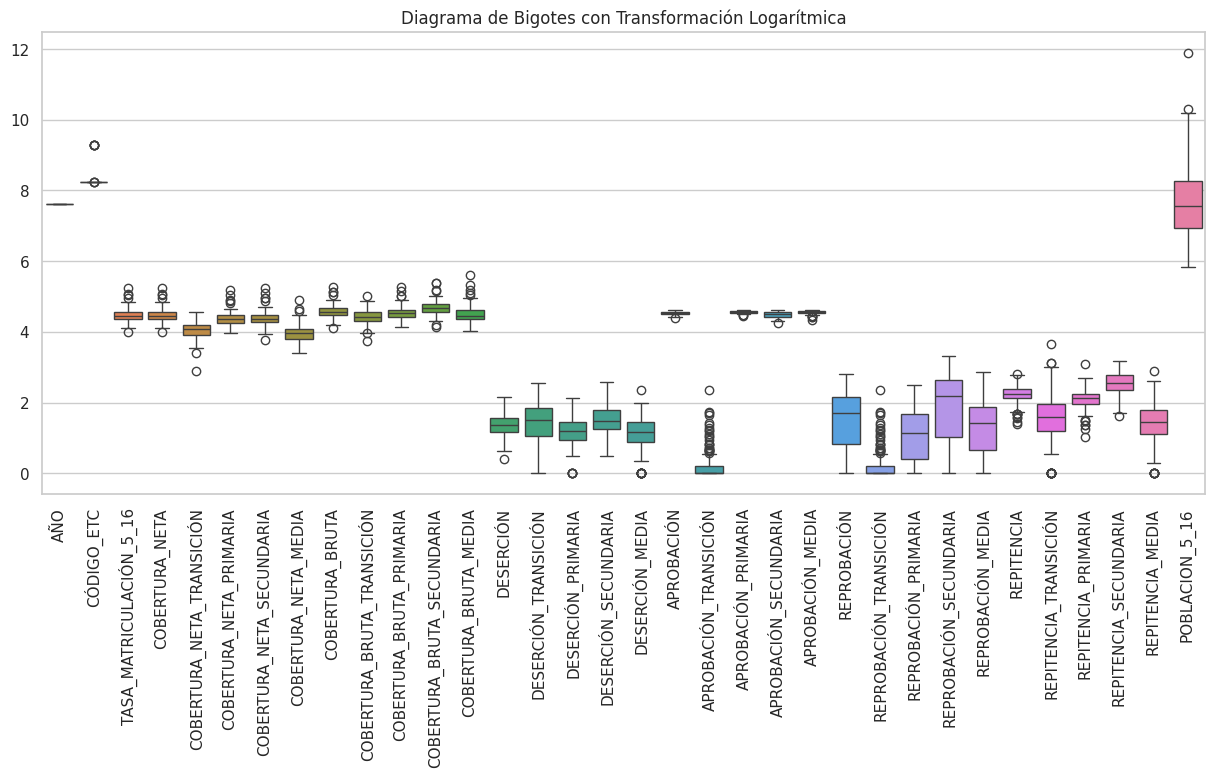

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame para evitar modificar el original
df_filtrado = df_educacion_limpio.copy()

# Aplicar transformación logarítmica a las columnas numéricas (sumando 1 para evitar log(0))
df_log = np.log1p(df_filtrado.select_dtypes(include=['number']))

# Crear un diagrama de bigotes mejorado
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_log)
plt.xticks(rotation=90)
plt.title("Diagrama de Bigotes con Transformación Logarítmica")
plt.show()


In [ ]:
# Eliminar columnas innecesarias
df_educacion_limpio = df_educacion_limpio.drop(columns=['APROBACIÓN_TRANSICIÓN'])

In [ ]:
# Guardar el contenido de el DF limpio en el DF original
df_educacion = df_educacion_limpio.copy()
print(df_educacion.head())

      AÑO     MUNICIPIO  CÓDIGO_ETC                 ETC POBLACIÓN_5_16  \
458  2023  Agua de Dios      3785.0  Cundinamarca (ETC)           1909   
459  2023         Albán      3785.0  Cundinamarca (ETC)           1224   
460  2023      Anapoima      3785.0  Cundinamarca (ETC)           2647   
461  2023      Anolaima      3785.0  Cundinamarca (ETC)           2553   
462  2023      Arbeláez      3785.0  Cundinamarca (ETC)           1894   

     TASA_MATRICULACIÓN_5_16  COBERTURA_NETA  COBERTURA_NETA_TRANSICIÓN  \
458                    79.36           79.36                      59.29   
459                    75.49           75.49                      50.96   
460                    95.92           95.88                      76.42   
461                    93.85           93.26                      59.90   
462                    83.53           83.53                      46.90   

     COBERTURA_NETA_PRIMARIA  COBERTURA_NETA_SECUNDARIA  ...  \
458                    73.07            

## DataFrame: IDF municipios

In [ ]:
df_idf1.columns = df_idf1.columns.str.strip().str.upper()
print(df_idf1.columns)  # Volver a imprimir para verificar


Index(['CÓDIGO', 'DEPARTAMENTO', 'MUNICIPIO', 'CATEGORÍAS',
       'DOTACIONES INICIALES', 'CIUDAD CAPITAL',
       'DEPENDENCIA DE LAS TRANSFERENCIAS',
       'CALIFICACIÓN DEPENDENCIA DE LAS TRANSFERENCIAS', 'RELEVANCIA FBK FIJO',
       'CALIFICACIÓN RELEVANCIA FBK FIJO', 'ENDEUDAMIENTO (TOTAL)',
       'CALIFICACIÓN ENDEUDAMIENTO TOTAL', 'AHORRO CORRIENTE',
       'CALIFICACIÓN AHORRO CORRIENTE', 'BALANCE PRIMARIO',
       'CALIFICACIÓN BALANCE PRIMARIO', 'RESULTADOS',
       'CALIFICACIÓN RESULTADOS', 'HOLGURA', 'CALIFICACIÓN HOLGURA',
       'CAPACIDAD DE PROGRAMACIÓN Y RECAUDO DE INGRESOS',
       'CALIFICACIÓN CAPACIDAD DE PROGRAMACIÓN Y RECAUDO DE INGRESOS',
       'CAPACIDAD DE EJECUCIÓN DE INVERSIÓN',
       'CALIFICACIÓN CAPACIDAD DE EJECUCIÓN DE INVERSIÓN',
       'BONIFICACIÓN ESFUERZO PROPIO', 'BONO CATASTRO', 'RESULTADOS GESTIÓN',
       'GESTIÓN +BONOS', 'CALIFICACIÓN RESULTADOS GESTIÓN',
       'NUEVO IDF (SIN BONOS)', 'NUEVO IDF', 'RANGO'],
      dtype='object')


In [ ]:
df_idf1 = df_idf1[df_idf1['DEPARTAMENTO'].str.upper().str.strip() == 'CUNDINAMARCA']
print(f"Número de municipios en Cundinamarca: {df_idf1.shape[0]}")


Número de municipios en Cundinamarca: 116


In [ ]:
print(df_idf1.isnull().sum())

CÓDIGO                                                          0
DEPARTAMENTO                                                    0
MUNICIPIO                                                       0
CATEGORÍAS                                                      0
DOTACIONES INICIALES                                            0
CIUDAD CAPITAL                                                  0
DEPENDENCIA DE LAS TRANSFERENCIAS                               0
CALIFICACIÓN DEPENDENCIA DE LAS TRANSFERENCIAS                  0
RELEVANCIA FBK FIJO                                             0
CALIFICACIÓN RELEVANCIA FBK FIJO                                0
ENDEUDAMIENTO (TOTAL)                                           0
CALIFICACIÓN ENDEUDAMIENTO TOTAL                                0
AHORRO CORRIENTE                                                0
CALIFICACIÓN AHORRO CORRIENTE                                   0
BALANCE PRIMARIO                                                0
CALIFICACI

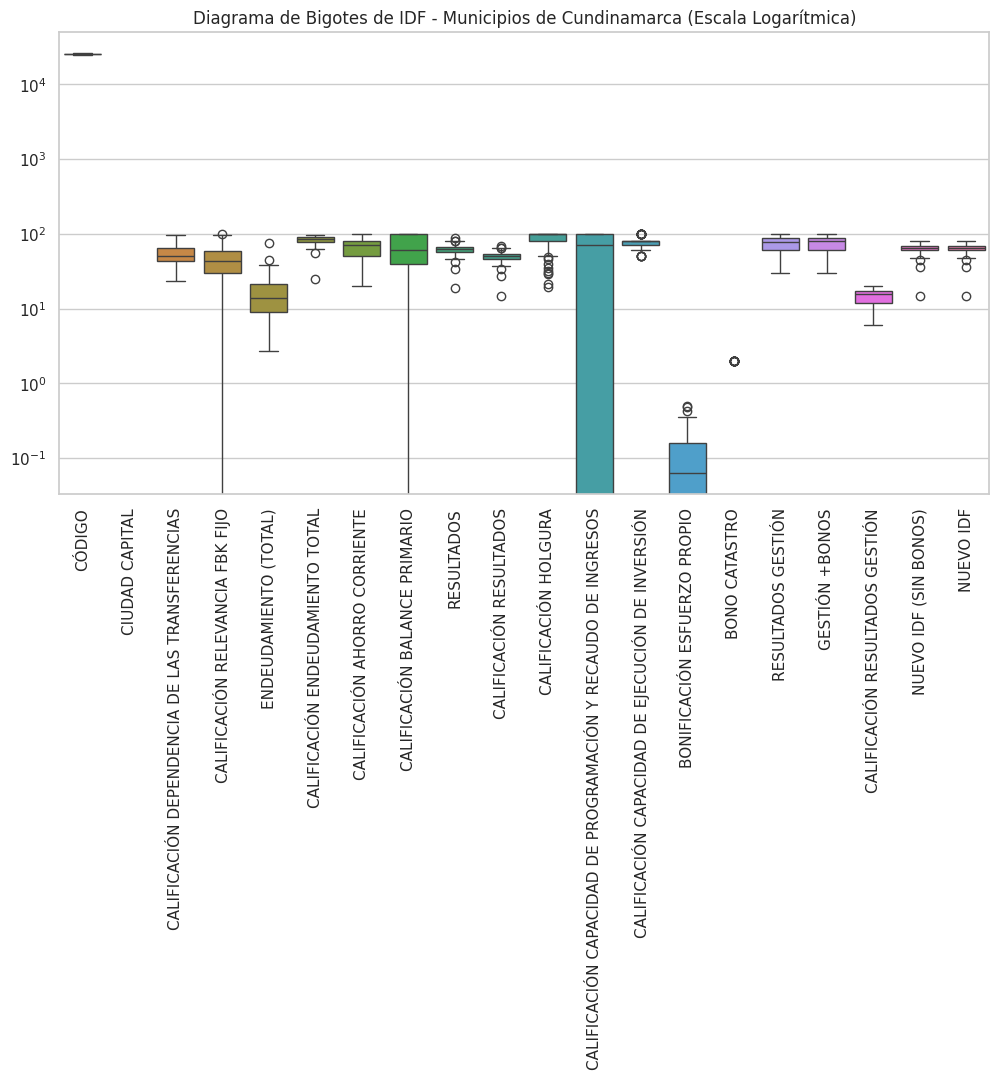

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar solo las columnas numéricas
columnas_numericas = df_idf1.select_dtypes(include=[np.number])

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el boxplot con escala logarítmica
sns.boxplot(data=columnas_numericas)
plt.yscale('log')  # Aplicar escala logarítmica
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.title("Diagrama de Bigotes de IDF - Municipios de Cundinamarca (Escala Logarítmica)")

# Mostrar el gráfico
plt.show()


In [ ]:
df_idf2.columns = df_idf2.columns.str.strip().str.upper()
print(df_idf2.columns)  # Volver a imprimir para verificar


Index(['CÓDIGO', 'DEPARTAMENTO', 'CATEGORÍAS',
       'DEPENDENCIA DE LAS TRANSFERENCIAS',
       'CALIFICACIÓN DEPENDENCIA DE LAS TRANSFERENCIAS', 'RELEVANCIA FBK FIJO',
       'CALIFICACIÓN RELEVANCIA FBK FIJO', 'ENDEUDAMIENTO (TOTAL)',
       'CALIFICACIÓN ENDEUDAMIENTO TOTAL', 'AHORRO CORRIENTE',
       'CALIFICACIÓN AHORRO CORRIENTE', 'BALANCE PRIMARIO',
       'CALIFICACIÓN BALANCE PRIMARIO', 'RESULTADOS',
       'CALIFICACIÓN RESULTADOS', 'HOLGURA', 'CALIFICACIÓN HOLGURA',
       'CAPACIDAD DE PROGRAMACIÓN Y RECAUDO DE INGRESOS',
       'CALIFICACIÓN CAPACIDAD DE PROGRAMACIÓN Y RECAUDO DE INGRESOS',
       'CAPACIDAD DE EJECUCIÓN DE INVERSIÓN',
       'CALIFICACIÓN CAPACIDAD DE EJECUCIÓN DE INVERSIÓN',
       'BONIFICACIÓN ESFUERZO PROPIO', 'RESULTADOS GESTIÓN', 'GESTIÓN +BONOS',
       'CALIFICACIÓN RESULTADOS GESTIÓN', 'NUEVO IDF (SIN BONOS)', 'NUEVO IDF',
       'RANGO'],
      dtype='object')


In [ ]:
df_idf2 = df_idf2[df_idf2['DEPARTAMENTO'].str.upper().str.strip() == 'CUNDINAMARCA']
print(f"Filas totales: {df_idf2.shape[0]}")

Número de municipios en Cundinamarca: 1


In [ ]:
print(df_idf2.isnull().sum())

CÓDIGO                                                          0
DEPARTAMENTO                                                    0
CATEGORÍAS                                                      0
DEPENDENCIA DE LAS TRANSFERENCIAS                               0
CALIFICACIÓN DEPENDENCIA DE LAS TRANSFERENCIAS                  0
RELEVANCIA FBK FIJO                                             0
CALIFICACIÓN RELEVANCIA FBK FIJO                                0
ENDEUDAMIENTO (TOTAL)                                           0
CALIFICACIÓN ENDEUDAMIENTO TOTAL                                0
AHORRO CORRIENTE                                                0
CALIFICACIÓN AHORRO CORRIENTE                                   0
BALANCE PRIMARIO                                                0
CALIFICACIÓN BALANCE PRIMARIO                                   0
RESULTADOS                                                      0
CALIFICACIÓN RESULTADOS                                         0
HOLGURA   

In [ ]:
df_poblacion.columns = df_poblacion.columns.str.strip().str.upper()
print(df_poblacion.columns)  # Volver a imprimir para verificar


Index(['MUNICIPIO', 'MUJERES', 'HOMBRES', 'TOTAL'], dtype='object')


In [ ]:
print(df_poblacion.isnull().sum())

MUNICIPIO    0
MUJERES      0
HOMBRES      0
TOTAL        0
dtype: int64


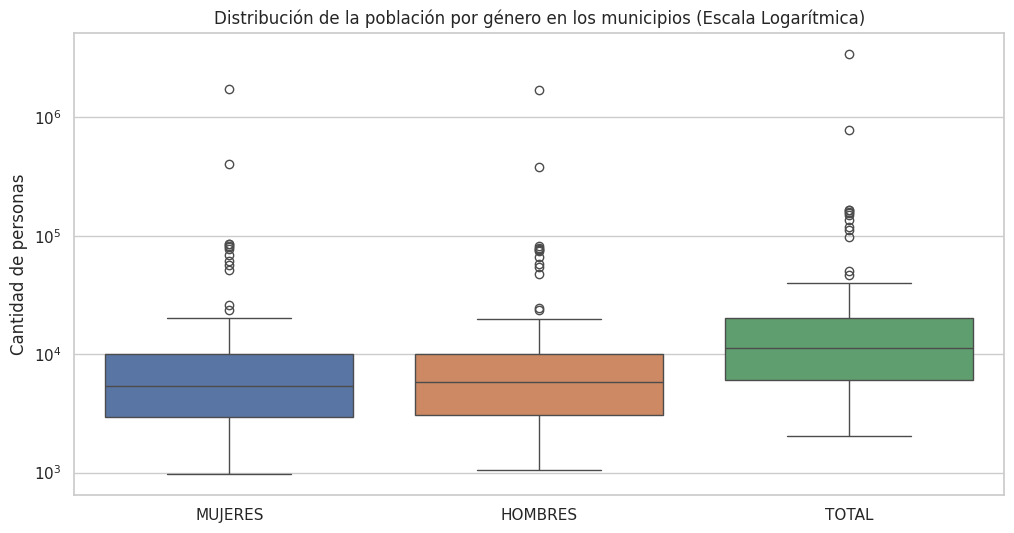

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear boxplot para MUJERES, HOMBRES y TOTAL con escala logarítmica
sns.boxplot(data=df_poblacion[['MUJERES', 'HOMBRES', 'TOTAL']])
plt.yscale('log')  # Aplicar escala logarítmica
plt.title('Distribución de la población por género en los municipios (Escala Logarítmica)')
plt.ylabel('Cantidad de personas')

plt.show()



In [ ]:
df_internet.columns = df_internet.columns.str.strip().str.upper()
print(df_internet.columns)  # Volver a imprimir para verificar


Index(['AÑO', 'TRIMESTRE', 'COD_DEPARTAMENTO', 'DEPARTAMENTO', 'COD_MUNICIPIO',
       'MUNICIPIO', 'NO. ACCESOS FIJOS A INTERNET', 'POBLACIÓN DANE',
       'INDICE'],
      dtype='object')


In [ ]:
print(df_internet.isnull().sum())

AÑO                             0
TRIMESTRE                       0
COD_DEPARTAMENTO                0
DEPARTAMENTO                    0
COD_MUNICIPIO                   0
MUNICIPIO                       0
NO. ACCESOS FIJOS A INTERNET    0
POBLACIÓN DANE                  0
INDICE                          0
dtype: int64


In [ ]:
df_internet = df_internet[(df_internet['AÑO'] == 2023) & (df_internet['DEPARTAMENTO'] == 'CUNDINAMARCA')]
print(f"Filas totales: {df_internet.shape[0]}")


Filas totales: 348


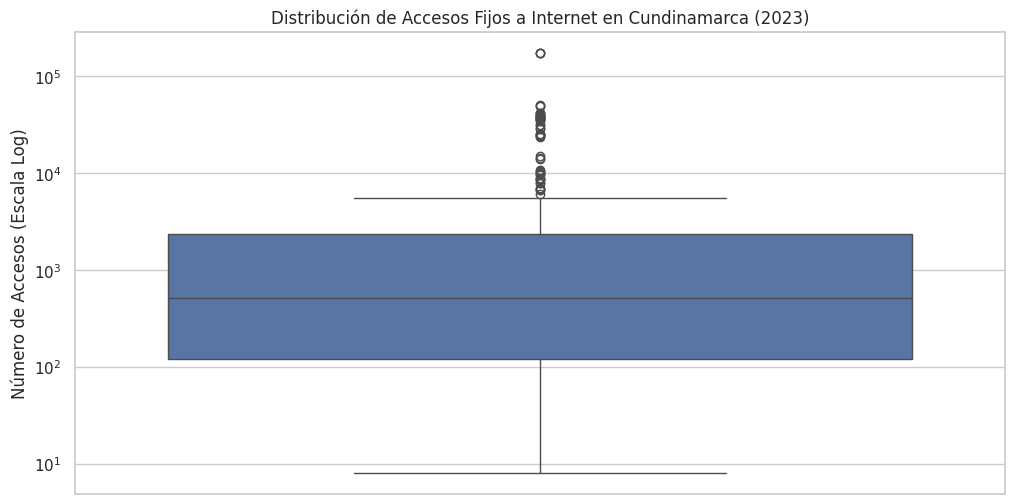

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_internet, y='NO. ACCESOS FIJOS A INTERNET')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.title('Distribución de Accesos Fijos a Internet en Cundinamarca (2023)')
plt.ylabel('Número de Accesos (Escala Log)')
plt.show()


In [185]:
from scipy.stats import zscore

# Crear una nueva columna con la tasa de acceso a internet por población
df_internet["TASA_ACCESOS"] = df_internet["NO. ACCESOS FIJOS A INTERNET"] / df_internet["POBLACIÓN DANE"]

# Aplicar la estandarización usando Z-score
df_internet["Z_SCORE_TASA_ACCESOS"] = zscore(df_internet["TASA_ACCESOS"])

# Mostrar resumen de los valores estandarizados
df_internet[["MUNICIPIO", "TASA_ACCESOS", "Z_SCORE_TASA_ACCESOS"]].head()


<ipython-input-185-1b8d13875dab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet["TASA_ACCESOS"] = df_internet["NO. ACCESOS FIJOS A INTERNET"] / df_internet["POBLACIÓN DANE"]
<ipython-input-185-1b8d13875dab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet["Z_SCORE_TASA_ACCESOS"] = zscore(df_internet["TASA_ACCESOS"])


,MUNICIPIO,TASA_ACCESOS,Z_SCORE_TASA_ACCESOS
1728,BITUIMA,0.003906,-0.988379
1761,SUPATÁ,0.037252,-0.602190
1819,GUADUAS,0.060439,-0.333647
1834,VIANÍ,0.017724,-0.828355
1915,VILLA DE SAN DIEGO DE UBATE,0.200372,1.286982


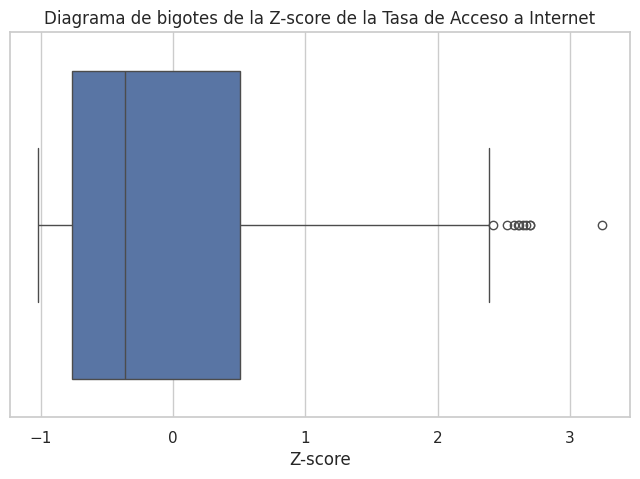

In [186]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_internet["Z_SCORE_TASA_ACCESOS"])
plt.title("Diagrama de bigotes de la Z-score de la Tasa de Acceso a Internet")
plt.xlabel("Z-score")
plt.show()
